In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import MobileNetV2, EfficientNetB0
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Path to ORIGINAL dataset only (10 fish species)
BASELINE_DATASET_PATH = "/content/drive/MyDrive/project/SmallFishBD/SmallFishBD/Original"
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_ds = image_dataset_from_directory(
    BASELINE_DATASET_PATH,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = image_dataset_from_directory(
    BASELINE_DATASET_PATH,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

NUM_CLASSES = len(train_ds.class_names)


Found 1108 files belonging to 10 classes.
Using 887 files for training.
Found 1108 files belonging to 10 classes.
Using 221 files for validation.


In [ ]:
normalization_layer = layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))



In [ ]:
mobilenet_base = MobileNetV2(
    weights="imagenet",
    include_top=False,
    input_shape=(224, 224, 3)
)

mobilenet_base.trainable = False

mobilenet_model = models.Sequential([
    mobilenet_base,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation="relu"),
    layers.Dense(NUM_CLASSES, activation="softmax")
])

mobilenet_model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

hist_mobilenet = mobilenet_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=8
)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/8
28/28 ━━━━━━━━━━━━━━━━━━━━ 148s 5s/step - accuracy: 0.5161 - loss: 1.6866 - val_accuracy: 0.9457 - val_loss: 0.2106
Epoch 2/8
28/28 ━━━━━━━━━━━━━━━━━━━━ 80s 3s/step - accuracy: 0.9873 - loss: 0.1122 - val_accuracy: 0.9729 - val_loss: 0.0871
Epoch 3/8
28/28 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.9996 - loss: 0.0422 - val_accuracy: 0.9819 - val_loss: 0.0750
Epoch 4/8
28/28 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.9990 - loss: 0.0272 - val_accuracy: 0.9864 - val_loss: 0.0560
Epoch 5/8
28/28 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 1.0000 - loss: 0.0179 - val_accuracy: 0.9864 - val_loss: 0.0493
Epoch 6/8
28/28 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step - accuracy: 1.0000 - loss: 0.0137 - val_accuracy: 0.9864 - val_loss: 0.0493
Epoch 7/8
28/28 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 1.0000 - loss: 0.0105 - val_accuracy: 0.9864 - val_loss: 0.0358
Epoch 8/8
28/28 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 1.0000 - loss:

In [ ]:
efficientnet_base = EfficientNetB0(
    weights="imagenet",
    include_top=False,
    input_shape=(224, 224, 3)
)

efficientnet_base.trainable = False

efficientnet_model = models.Sequential([
    efficientnet_base,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation="relu"),
    layers.Dense(NUM_CLASSES, activation="softmax")
])

efficientnet_model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

hist_efficientnet = efficientnet_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=8
)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/8
28/28 ━━━━━━━━━━━━━━━━━━━━ 116s 4s/step - accuracy: 0.1058 - loss: 2.3428 - val_accuracy: 0.0769 - val_loss: 2.3351
Epoch 2/8
28/28 ━━━━━━━━━━━━━━━━━━━━ 96s 3s/step - accuracy: 0.1088 - loss: 2.3108 - val_accuracy: 0.1086 - val_loss: 2.3222
Epoch 3/8
28/28 ━━━━━━━━━━━━━━━━━━━━ 90s 3s/step - accuracy: 0.1256 - loss: 2.3138 - val_accuracy: 0.1086 - val_loss: 2.3057
Epoch 4/8
28/28 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step - accuracy: 0.1236 - loss: 2.3030 - val_accuracy: 0.1086 - val_loss: 2.3138
Epoch 5/8
28/28 ━━━━━━━━━━━━━━━━━━━━ 91s 3s/step - accuracy: 0.1346 - loss: 2.2870 - val_accuracy: 0.0860 - val_loss: 2.3081
Epoch 6/8
28/28 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.1346 - loss: 2.2939 - val_accuracy: 0.1086 - val_loss: 2.3078
Epoch 7/8
28/28 ━━━━━━━━━━━━━━━━━━━━ 155s 3s/step - accuracy: 0.1365 - loss: 2.2897 - val_accuracy: 0.0860 - val_loss: 2.3087
Epoch 8/8
28/28 ━━━━━━━━━━━━━━━━━━━━ 87s 3s/step - accuracy: 0.1361 - lo

In [ ]:
mn_val_acc = hist_mobilenet.history["val_accuracy"][-1]
en_val_acc = hist_efficientnet.history["val_accuracy"][-1]

print("MobileNetV2 Val Acc:", mn_val_acc)
print("EfficientNetB0 Val Acc:", en_val_acc)


MobileNetV2 Val Acc: 0.9864253401756287
EfficientNetB0 Val Acc: 0.1085972860455513


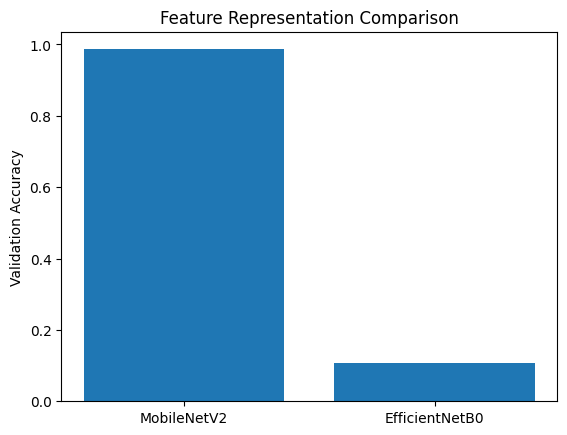

In [ ]:
plt.bar(
    ["MobileNetV2", "EfficientNetB0"],
    [mn_val_acc, en_val_acc]
)
plt.ylabel("Validation Accuracy")
plt.title("Feature Representation Comparison")
plt.show()


In [ ]:
import tensorflow as tf

data_dir = "/content/drive/MyDrive/project/SmallFishBD/SmallFishBD/Original"

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(224, 224),
    batch_size=32,
    label_mode="categorical"
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(224, 224),
    batch_size=32,
    label_mode="categorical"
)


Found 1108 files belonging to 10 classes.
Using 887 files for training.
Found 1108 files belonging to 10 classes.
Using 221 files for validation.


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score

# Normalize the validation dataset (0-255 -> 0-1) to match training preprocessing
val_ds_normalized = val_ds.map(lambda x, y: (x / 255.0, y))

# Use mobilenet_model as it had the highest validation accuracy
eval_model = mobilenet_model

y_true = []
y_pred = []

print("Generating predictions for evaluation...")
for images, labels in val_ds_normalized:
    preds = eval_model.predict(images, verbose=0)
    y_pred.extend(np.argmax(preds, axis=1))
    # labels are categorical (one-hot), so we take argmax to get the class index
    y_true.extend(np.argmax(labels.numpy(), axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)

print(f"\nValidation Accuracy: {accuracy_score(y_true, y_pred):.4f}")
print("\nClassification Report:")
# Note: train_ds.class_names contains the 10 fish species names
print(classification_report(y_true, y_pred, target_names=train_ds.class_names))

Generating predictions for evaluation...

Validation Accuracy: 0.9864

Classification Report:
              precision    recall  f1-score   support

  Baila Fish       1.00      0.96      0.98        24
 Bujuri Fish       1.00      0.94      0.97        17
 Chanda Fish       1.00      1.00      1.00        19
Chapila Fish       0.93      1.00      0.96        26
  Dhela Fish       1.00      1.00      1.00        21
 Kachki Fish       0.96      1.00      0.98        27
 Kajoli Fish       1.00      1.00      1.00        24
   Mola Fish       1.00      0.95      0.97        20
   Puti Fish       1.00      1.00      1.00        18
 Tengra Fish       1.00      1.00      1.00        25

    accuracy                           0.99       221
   macro avg       0.99      0.98      0.99       221
weighted avg       0.99      0.99      0.99       221



In [ ]:
target_names = [
    "Bele", "Nama Chanda", "Chela", "Guchi", "Kachki",
    "Mola", "Kata Phasa", "Pabda", "Puti", "Tengra"
]

report = classification_report(
    y_true, y_pred, target_names=target_names, digits=4
)

print(report)


              precision    recall  f1-score   support

        Bele     1.0000    0.9583    0.9787        24
 Nama Chanda     1.0000    0.9412    0.9697        17
       Chela     1.0000    1.0000    1.0000        19
       Guchi     0.9286    1.0000    0.9630        26
      Kachki     1.0000    1.0000    1.0000        21
        Mola     0.9643    1.0000    0.9818        27
  Kata Phasa     1.0000    1.0000    1.0000        24
       Pabda     1.0000    0.9500    0.9744        20
        Puti     1.0000    1.0000    1.0000        18
      Tengra     1.0000    1.0000    1.0000        25

    accuracy                         0.9864       221
   macro avg     0.9893    0.9850    0.9868       221
weighted avg     0.9872    0.9864    0.9865       221



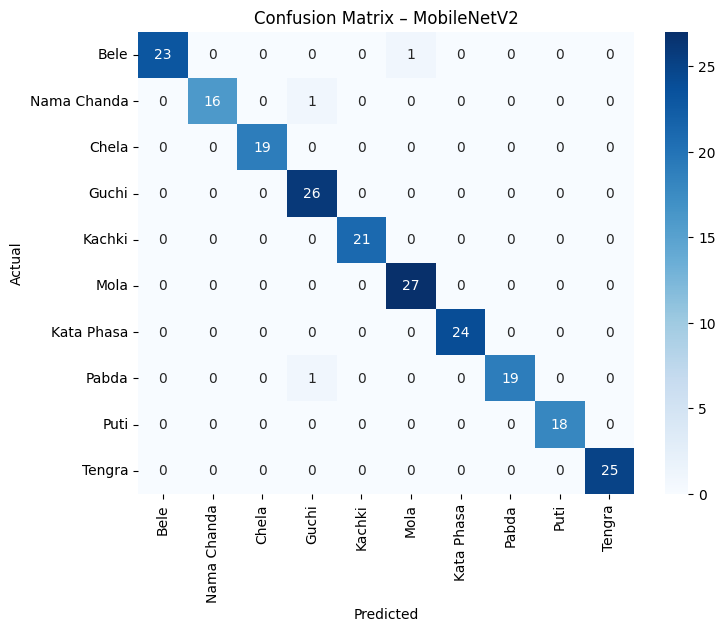

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=target_names,
            yticklabels=target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – MobileNetV2")
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score

def evaluate_subset(dataset, fraction):
    y_t, y_p = [], []
    # len(dataset) is the total number of batches
    total_batches = max(1, int(len(dataset) * fraction))

    print(f"Evaluating {total_batches} batches ({fraction*100}% of data)... ")
    for i, (images, labels) in enumerate(dataset):
        if i >= total_batches:
            break
        # Use the specific mobilenet_model defined earlier
        preds = mobilenet_model.predict(images, verbose=0)
        y_p.extend(np.argmax(preds, axis=1))

        # Handle both categorical (one-hot) and integer labels
        lbls_np = labels.numpy()
        if len(lbls_np.shape) > 1: # Categorical/One-hot
            y_t.extend(np.argmax(lbls_np, axis=1))
        else: # Integer indices
            y_t.extend(lbls_np)

    return accuracy_score(y_t, y_p)

# Using the normalized validation dataset created in previous steps
# Note: Ensure gRR8o6trWjid has been run to define val_ds_normalized
acc_25 = evaluate_subset(val_ds_normalized, 0.25)
acc_50 = evaluate_subset(val_ds_normalized, 0.50)
acc_100 = evaluate_subset(val_ds_normalized, 1.00)

print(f"\nAccuracy @25% data: {acc_25:.4f}")
print(f"Accuracy @50% data: {acc_50:.4f}")
print(f"Accuracy @100% data: {acc_100:.4f}")

Evaluating 1 batches (25.0% of data)... 
Evaluating 3 batches (50.0% of data)... 
Evaluating 7 batches (100.0% of data)... 

Accuracy @25% data: 0.9375
Accuracy @50% data: 0.9896
Accuracy @100% data: 0.9864


In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import accuracy_score

def add_noise(images, noise_factor=0.1):
    noise = tf.random.normal(shape=tf.shape(images), mean=0.0, stddev=noise_factor)
    noisy_images = images + noise
    return tf.clip_by_value(noisy_images, 0.0, 1.0)

y_true_noise = []
y_pred_noise = []

# Using val_ds_normalized which is scaled to [0, 1]
print("Evaluating robustness with Gaussian Noise...")
for images, labels in val_ds_normalized:
    noisy_imgs = add_noise(images)
    preds = mobilenet_model.predict(noisy_imgs, verbose=0)
    y_pred_noise.extend(np.argmax(preds, axis=1))
    # labels are categorical (one-hot) from cell DkUq-SKkWec6
    y_true_noise.extend(np.argmax(labels.numpy(), axis=1))

noise_accuracy = accuracy_score(y_true_noise, y_pred_noise)
print(f"\nAccuracy with Gaussian Noise (stddev=0.1): {noise_accuracy:.4f}")

Evaluating robustness with Gaussian Noise...

Accuracy with Gaussian Noise (stddev=0.1): 0.7692
